In [37]:
import polars as pl

In [38]:
df = pl.read_csv("train.csv")
df_test = pl.read_csv("test.csv")

In [39]:
df.head()

id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
i64,str,f64,f64,f64,f64,f64,f64,f64,i64
0,"""I""",1.525,1.175,0.375,28.973189,12.728926,6.647958,8.348928,9
1,"""I""",1.1,0.825,0.275,10.418441,4.521745,2.324659,3.40194,8
2,"""M""",1.3875,1.1125,0.375,24.777463,11.3398,5.556502,6.6621325,9
3,"""F""",1.7,1.4125,0.5,50.660556,20.354941,10.991839,14.996885,11
4,"""I""",1.25,1.0125,0.3375,23.289114,11.977664,4.5075705,5.953395,8


In [40]:
df.describe()

statistic,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",74051.0,"""74051""",74051.0,74051.0,74051.0,74051.0,74051.0,74051.0,74051.0,74051.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",37025.0,null,1.31746,1.024496,0.348089,23.385217,10.10427,5.058386,6.72387,9.967806
"""std""",21376.826729,null,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
"""min""",0.0,"""F""",0.1875,0.1375,0.0,0.056699,0.0283495,0.042524,0.042524,1.0
"""25%""",18513.0,null,1.15,0.8875,0.3,13.437663,5.712424,2.8632995,3.96893,8.0
"""50%""",37025.0,null,1.375,1.075,0.3625,23.799405,9.90815,4.989512,6.931453,10.0
"""75%""",55538.0,null,1.5375,1.2,0.4125,32.162508,14.033003,6.988152,9.07184,11.0
"""max""",74050.0,"""M""",2.0128145,1.6125,2.825,80.101512,42.184056,21.54562,28.491248,29.0


In [41]:
result = df.select([
    pl.col("Age").mean().alias("age_mean"),
    pl.col("Age").median().alias("age_median"),
    pl.col("Age").std().alias("age_std"),
    pl.col("Age").min().alias("age_min"),
    pl.col("Age").max().alias("age_max")
])

In [42]:
print(result)

shape: (1, 5)
┌──────────┬────────────┬──────────┬─────────┬─────────┐
│ age_mean ┆ age_median ┆ age_std  ┆ age_min ┆ age_max │
│ ---      ┆ ---        ┆ ---      ┆ ---     ┆ ---     │
│ f64      ┆ f64        ┆ f64      ┆ i64     ┆ i64     │
╞══════════╪════════════╪══════════╪═════════╪═════════╡
│ 9.967806 ┆ 10.0       ┆ 3.175189 ┆ 1       ┆ 29      │
└──────────┴────────────┴──────────┴─────────┴─────────┘


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

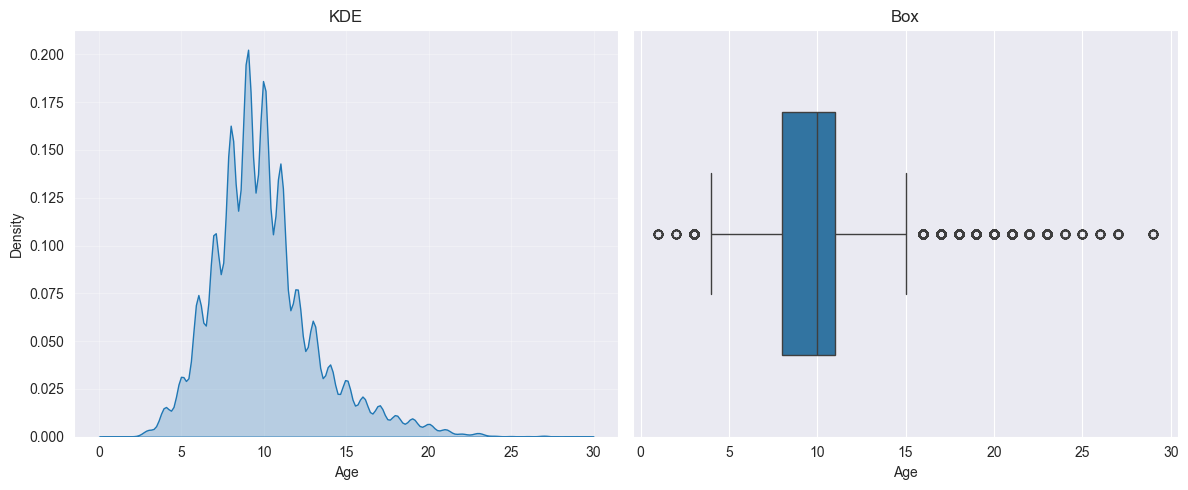

In [64]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(data=df, x="Age", ax=axes[0], fill=True)
axes[0].set_title("KDE")
axes[0].grid(True, alpha=0.3)
sns.boxplot(data=df, x="Age", ax=axes[1], width=0.6)
axes[1].set_title("Box")
plt.tight_layout()